In [94]:
# transform image into frequency domain using Fourier
# multiply with a filter H(u,v)
# H(u,v) will equal 1 if D(u,v) smaller than or equalD0
# H(u,v) will equal 0 if D(u,v) greater than D0
# D is the radius from the center
# D0 is the cut off freq and it should be positive
# D = [(u - M / 2) ** 2 + (v - N / 2) ** 2] ** (1/2)
# take the inverse Fourier's Transform

In [95]:
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [96]:
# image1_path = "jocelyn-morales-mGmhfO2CVV8-unsplash (1).jpg"
image2_path = "Gull_portrait_ca_usa.jpg"
# image1 = cv.imread(image1_path, 0)
image2 = cv.imread(image2_path, 0)

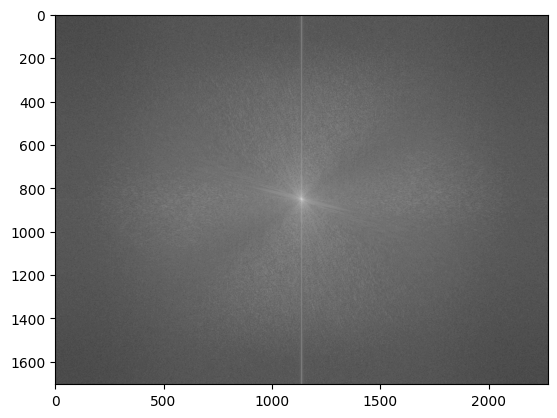

In [97]:
image2_freq = fft2(image2)
image2_freq_shift = fftshift(image2_freq)
plt.imshow(np.log1p(np.abs(image2_freq_shift)), cmap='gray')

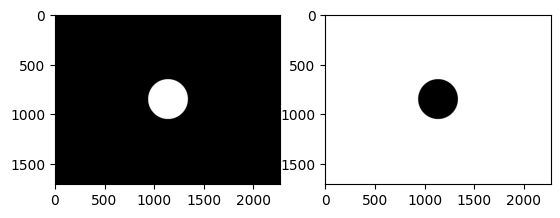

In [98]:
M,N = image2.shape  # M is number of rows and N is the number of columns
D0 = 200
H = np.zeros((M,N), dtype=np.float32)
for u in range(M):
    for v in range(N):
        D = ((u - M / 2) ** 2 + (v - N / 2) ** 2) ** (1 / 2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0

fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(H, cmap='gray')
fig.add_subplot(1, 2, 2)
plt.imshow(1 - H, cmap='gray') # highpass


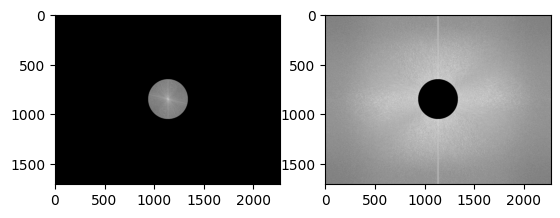

In [99]:
G_shift = H * image2_freq_shift
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(np.log1p(np.abs(G_shift)), cmap='gray')
fig.add_subplot(1, 2, 2)
G2_shift = (1 - H) * image2_freq_shift
plt.imshow(np.log1p(np.abs(G2_shift)), cmap='gray')

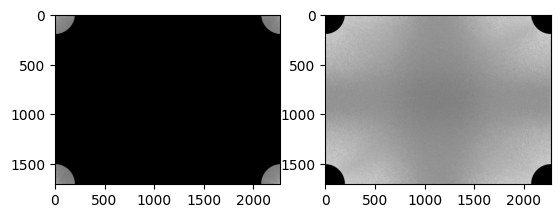

In [100]:
G = ifftshift(G_shift)
G2 = ifftshift(G2_shift)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
fig.add_subplot(1, 2, 2)
G2_shift = (1 - H) * image2_freq_shift
plt.imshow(np.log1p(np.abs(G2)), cmap='gray')


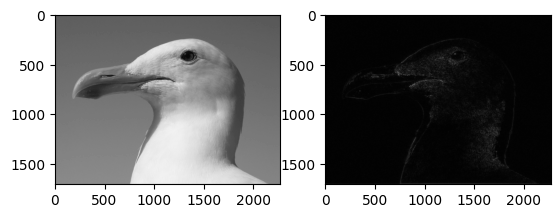

In [101]:
g = ifft2(G)
g2 = ifft2(G2)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(np.abs(g), cmap='gray')
fig.add_subplot(1, 2, 2)
G2_shift = (1 - H) * image2_freq_shift
plt.imshow(np.abs(g2), cmap='gray')


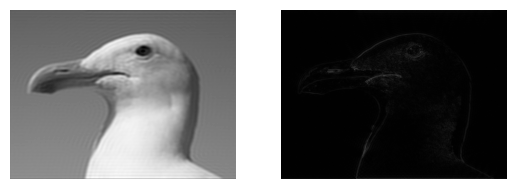

In [103]:
# transform image into frequency domain using Fourier
# multiply with a filter H(u,v)
# H(u,v) will equal 1 if D(u,v) smaller than or equalD0
# H(u,v) will equal 0 if D(u,v) greater than D0
# D is the radius from the center
# D0 is the cut off freq and it should be positive
# D = [(u - M / 2) ** 2 + (v - N / 2) ** 2] ** (1/2)
# take the inverse Fourier's Transform
"""
Low pass filter removes the high frequency components that means it keeps low frequency components.
It is used for smoothing the image.
It is used to smoothen the image by attenuating high frequency components and preserving low frequency components.

High pass filter removes the low frequency components that means it keeps high frequency components.
It is used for sharpening the image.
It is used to sharpen the image by attenuating low frequency components and preserving high frequency components.
"""

from numpy.fft import fft2, fftshift, ifftshift, ifft2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# -----------------reading the image-----------
image_path = "Gull_portrait_ca_usa.jpg"
image = cv.imread(image_path, 0)


# -----------------function to calculate the filter

def filter(img, cut_off_freq = 50):
    M, N = img.shape
    H = np.zeros((M, N), dtype = np.float32)
    D0 = cut_off_freq
    for u in range(M):
        for v in range(N):
            D = ((u - M / 2) ** 2 + (v - N / 2) ** 2) ** (1 / 2)
            if D <= D0:
                H[u,v] = 1
            else:
                H[u,v] = 0
    
    lowpass_filter = H
    highpass_filter = 1 - H

    image_FT = fft2(img)
    image_FT_shift = fftshift(image_FT)
    G_shift_low = image_FT_shift * lowpass_filter
    G_shift_high = image_FT_shift * highpass_filter
    g_low = ifft2(ifftshift(G_shift_low))
    g_high = ifft2(ifftshift(G_shift_high))

    return g_low, g_high
# ------------------------------testing it---
low, high = filter(image)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.axis("off")
plt.imshow(np.abs(low), cmap= 'gray')
fig.add_subplot(1, 2, 2)
plt.axis("off")
plt.imshow(np.abs(high), cmap= 'gray')